[](http://)# **Understanding COVID-19**

Exploratory analysis for understanding COVID-19 by country and state.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import csv
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Load Data

In [2]:
# read required data
uk_historical = pd.DataFrame(pd.read_csv('/kaggle/input/uncover/UNCOVER/github/covid-19-uk-historical-data.csv'))
test_by_country = pd.DataFrame(pd.read_csv('/kaggle/input/uncover/UNCOVER/world_bank/total-covid-19-tests-performed-by-country.csv'))
cases_by_country = pd.DataFrame(pd.read_csv('/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-over-time.csv'))
gov_measures = pd.DataFrame(pd.read_csv('/kaggle/input/uncover/UNCOVER/HDE_update/acaps-covid-19-government-measures-dataset.csv'))

In [3]:
cases_by_country_update = pd.DataFrame(pd.read_csv('/kaggle/input/uncover/UNCOVER/johns_hopkins_csse/johns-hopkins-covid-19-daily-dashboard-cases-by-country.csv'))
# cases_by_country_update.head(3)

most_confirmed = cases_by_country_update.\
                            sort_values(by = 'confirmed', ascending = False).\
                            iloc[:10][['country_region', 'confirmed']]

most_deaths = cases_by_country_update.\
                            sort_values(by = 'deaths', ascending = False).\
                            iloc[:10][['country_region', 'deaths']]

In [4]:
# Housekeeping for visuzalization
import matplotlib.colors

col_dict = {}
colors = [*matplotlib.colors.get_named_colors_mapping().keys()]
countries = cases_by_country_update.country_region.unique()

for i in range(len(countries)):
    col_dict[countries[i]] = np.random.choice(colors)
    colors.remove(col_dict[countries[i]])
    
col_dict['US'] = 'crimson'

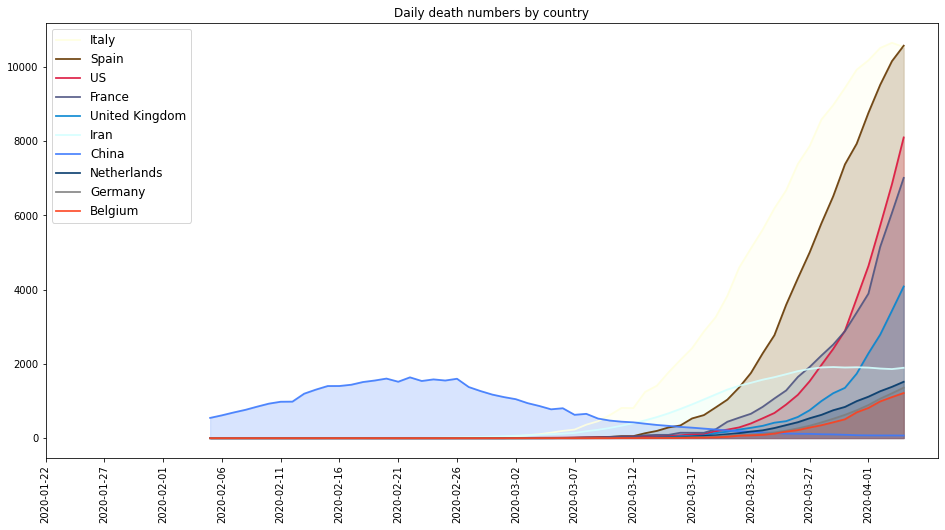

In [5]:
plt.figure(figsize=(16,8))
for c in [*most_deaths.country_region]:
    timeseries = cases_by_country[cases_by_country.country_region == c]
    dates = [*timeseries.last_update]
    plt.plot(dates, timeseries.deaths.diff().rolling(14).sum(), linewidth = 1.8, alpha = 0.9, color = col_dict[c],
             label = c)
    plt.fill_between(dates, timeseries.deaths.diff().rolling(14).sum(), color = col_dict[c], alpha=0.2)

plt.title('Daily death numbers by country')
plt.rcParams['font.size'] = 12
    
indices = np.arange(0, len(dates), 5)
plt.xticks([dates[x] for x in indices])
plt.xticks(rotation='vertical')
plt.legend()

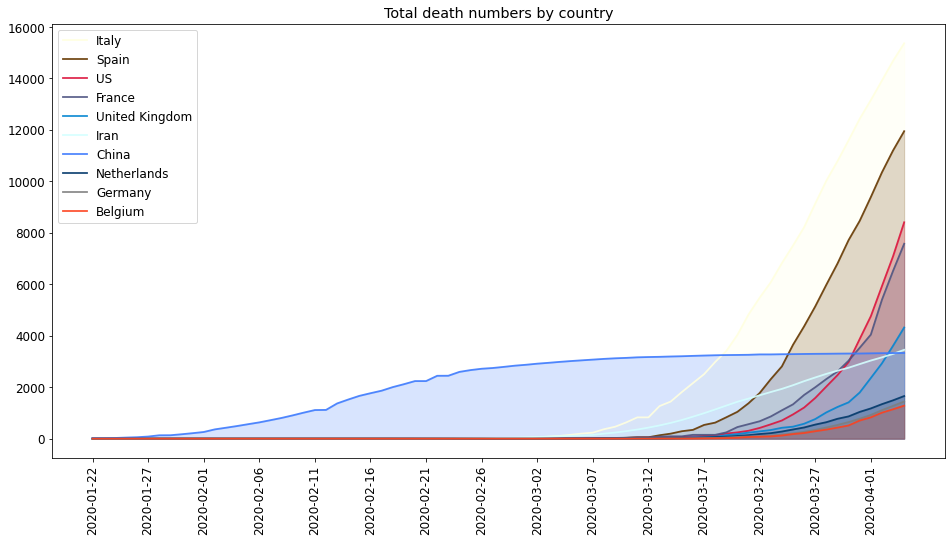

In [6]:
plt.figure(figsize=(16,8))
for c in [*most_deaths.country_region]:
    timeseries = cases_by_country[cases_by_country.country_region == c]
    dates = [*timeseries.last_update]
    plt.plot(dates, timeseries.deaths, linewidth = 1.8, alpha = 0.9, color = col_dict[c],
             label = c)
    plt.fill_between(dates, timeseries.deaths, color = col_dict[c], alpha=0.2)

plt.title('Total death numbers by country')
plt.rcParams['font.size'] = 12
    
indices = np.arange(0, len(dates), 5)
plt.xticks([dates[x] for x in indices])
plt.xticks(rotation='vertical')
plt.legend()

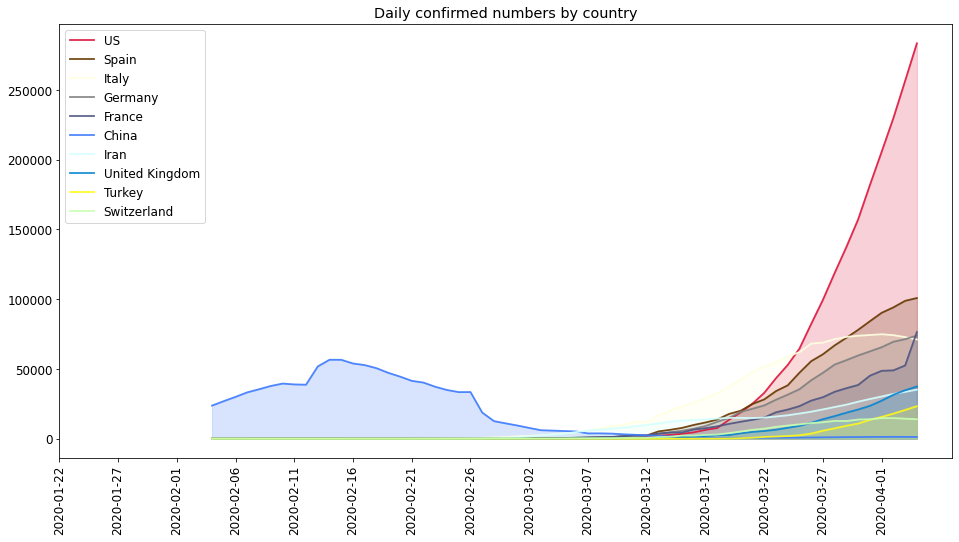

In [7]:
plt.figure(figsize=(16,8))
for c in [*most_confirmed.country_region]:
    timeseries = cases_by_country[cases_by_country.country_region == c]
    dates = [*timeseries.last_update]
    plt.plot(dates, timeseries.delta_confirmed.rolling(14).sum(), linewidth = 1.8, alpha = 0.9, color = col_dict[c],
             label = c)
    plt.fill_between(dates, timeseries.delta_confirmed.rolling(14).sum(), color = col_dict[c], alpha=0.2)

plt.title('Daily confirmed numbers by country')
plt.rcParams['font.size'] = 12
    
indices = np.arange(0, len(dates), 5)
plt.xticks([dates[x] for x in indices])
plt.xticks(rotation='vertical')
plt.legend()

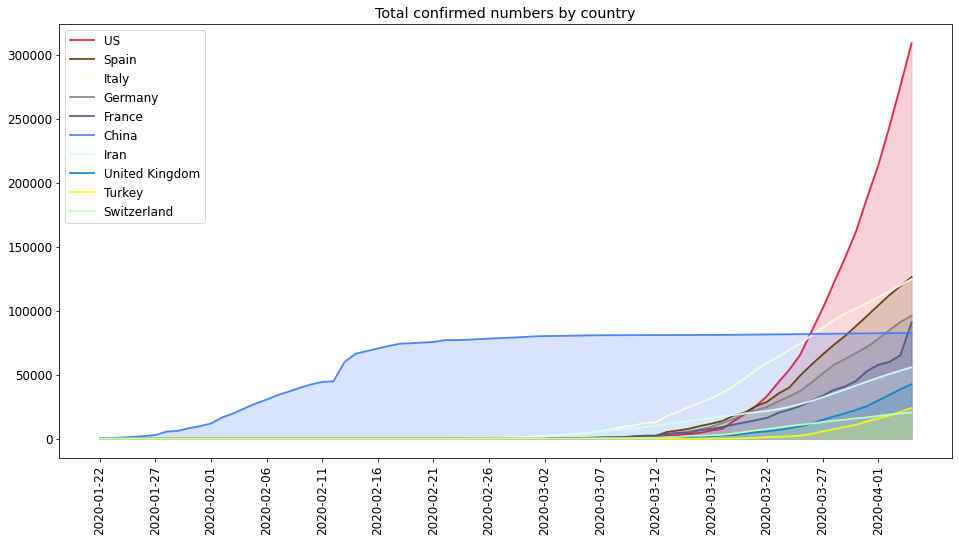

In [8]:
plt.figure(figsize=(16,8))
for c in [*most_confirmed.country_region]:
    timeseries = cases_by_country[cases_by_country.country_region == c]
    dates = [*timeseries.last_update]
    plt.plot(dates, timeseries.confirmed, linewidth = 1.8, alpha = 0.9, color = col_dict[c],
             label = c)
    plt.fill_between(dates, timeseries.confirmed, color = col_dict[c], alpha=0.2)

plt.title('Total confirmed numbers by country')
plt.rcParams['font.size'] = 12
    
indices = np.arange(0, len(dates), 5)
plt.xticks([dates[x] for x in indices])
plt.xticks(rotation='vertical')
plt.legend()

## 1 - United Kingdom

In [9]:
uk_historical.head(3)

,date,country,areacode,area,totalcases
0,2020-03-01,Scotland,S08000015,Ayrshire and Arran,0
1,2020-03-01,Scotland,S08000016,Borders,0
2,2020-03-01,Scotland,S08000017,Dumfries and Galloway,0


In [10]:
def annotate_and_format(bars, color_ = 'dimgrey'):
    max_height = max([x.get_height() for x in bars])
    plt.ylim(0, max_height*1.2)
    for i in bars:
        plt.text(i.get_x() + i.get_width()/2.5, 
                 i.get_height() + max_height * 0.04, 
                 str(i.get_height()),
                 fontsize = 15, color = color_)

In [11]:
# random selector for '1 to 4' cases to preserve the average
uk_historical['totalcases'] = uk_historical.totalcases.apply(lambda x: \
                                                             np.random.randint(2,4) \
                                                             if x == '1 to 4' else int(x))

In [12]:
# get most recent dates in data for each country in the UK
uk_cases = uk_historical.groupby('country').max()
most_recent = {c: uk_cases.loc[c].date for c in uk_cases.index}
most_recent

{'England': '2020-03-31',
 'Northern Ireland': '2020-04-01',
 'Scotland': '2020-04-01',
 'Wales': '2020-04-01'}

In [13]:
uk_case_by_country = {c: uk_historical[(uk_historical.country == c)&\
                                       (uk_historical.date == most_recent[c])].totalcases.sum()\
                      for c in most_recent.keys()}

uk_case_df = pd.DataFrame(uk_case_by_country, index= ['currentcases']).T.\
                          sort_values(by = 'currentcases', ascending = False)

uk_case_df

,currentcases
England,20194
Scotland,2310
Wales,1837
Northern Ireland,689


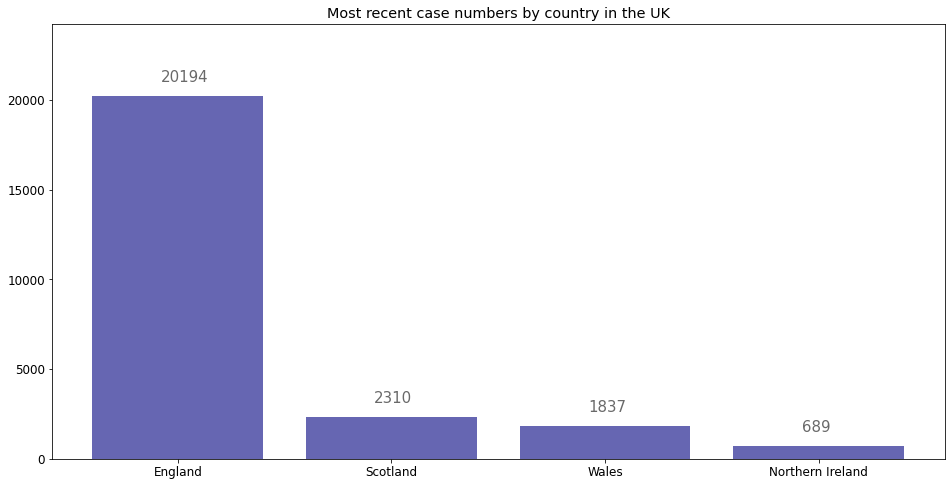

In [14]:
plt.figure(figsize=(16,8))
bars = plt.bar(uk_case_df.index, uk_case_df.currentcases, 
        color='navy', alpha = 0.6)

# annotate
annotate_and_format(bars)
plt.title('Most recent case numbers by country in the UK')
plt.rcParams['font.size'] = 15

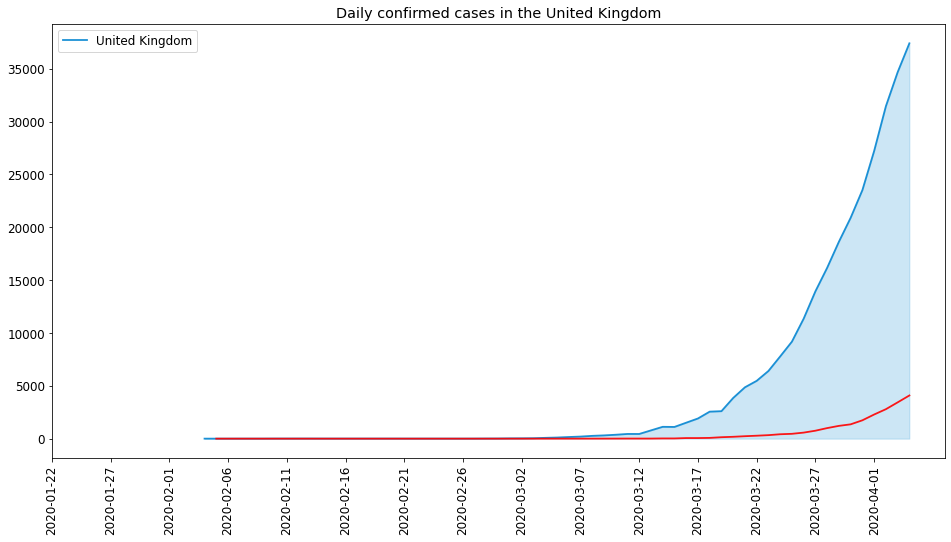

In [16]:
plt.figure(figsize=(16,8))
for c in ['United Kingdom']:
    timeseries = cases_by_country[cases_by_country.country_region == c]
    dates = [*timeseries.last_update]
    plt.plot(dates, timeseries.delta_confirmed.rolling(14).sum(), linewidth = 1.8, alpha = 0.9, color = col_dict[c],
             label = 'Confirmed COVID Cases (UK)')
    plt.plot(dates, timeseries.deaths.diff().rolling(14).sum(), linewidth = 1.8, alpha = 0.9, color = 'r',
             label = 'COVID-related Deaths (UK)')
    plt.fill_between(dates, timeseries.delta_confirmed.rolling(14).sum(), color = col_dict[c], alpha=0.2)
    plt.fill_between(dates, timeseries.deaths.diff().rolling(14).sum(), color = 'r', alpha=0.2)

plt.title('Daily confirmed cases in the United Kingdom')
plt.rcParams['font.size'] = 12
    
indices = np.arange(0, len(dates), 5)
plt.xticks([dates[x] for x in indices])
plt.xticks(rotation='vertical')
plt.legend()